In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
print(iris["feature_names"])
print(iris["target_names"])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [5]:
iris_data = iris.data
iris_target = iris.target

In [6]:
df_data = pd.DataFrame(data=iris_data, columns=iris.feature_names)
df_target = pd.DataFrame(data=iris_target, columns=['label'])

In [7]:
print(type(df_data))
print(type(df_target))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [8]:
df_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
df_target

,label
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [10]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [11]:
df_data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [12]:
# 결측값 확인

df_data.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [13]:
df_target.isna().sum()

label    0
dtype: int64

In [14]:
iris_data = pd.concat([df_data, df_target], axis=1)

In [15]:
iris_data = iris_data.drop(columns=['label'], axis=1)

In [16]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


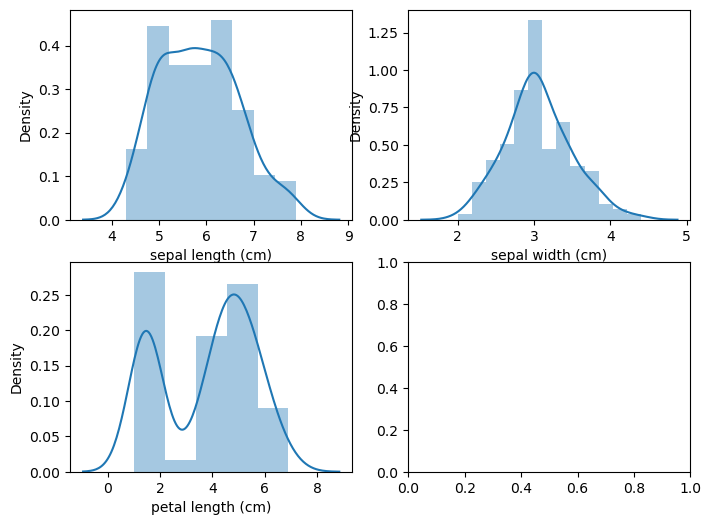

In [17]:
# EDA (Exploratory Data Analysis, 탐색적 데이터 분석)
# kde 곡선: Kernel Density Estimation(커널 밀도 추정)
# hist=False, kde=False

f, axes = plt.subplots(2, 2, figsize=(8, 6))

sns.distplot(iris_data['sepal length (cm)'], ax=axes[0, 0])

sns.distplot(iris_data['sepal width (cm)'], ax=axes[0, 1])

sns.distplot(iris_data['petal length (cm)'], ax=axes[1, 0])

#sns.distplot(iris_data['petal width (cm)'], ax=axes[1, 1])

plt.show()

<Axes: title={'center': 'Analyze Correlation of Features'}>

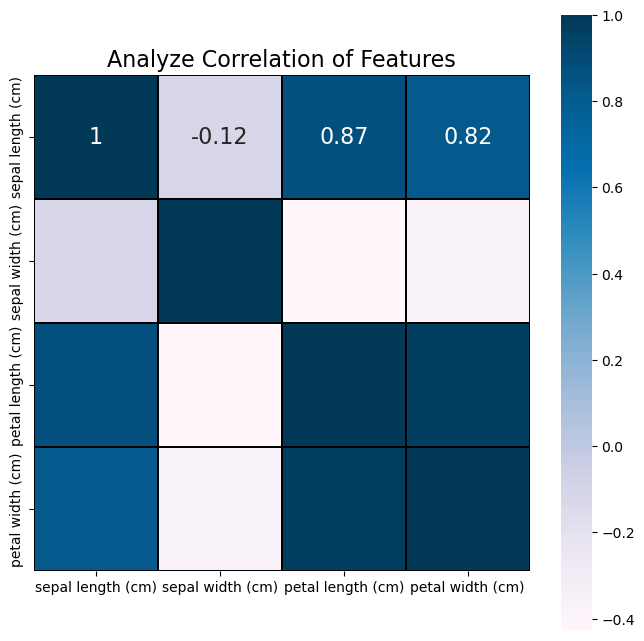

In [19]:
# heatmap

colormap = plt.cm.PuBu
plt.figure(figsize=(8, 8))
plt.title("Analyze Correlation of Features", y = 1.0, size = 16)
sns.heatmap(iris_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "black", annot = True, annot_kws = {"size" : 16})

In [20]:
x = iris_data
x = x.drop(columns=['petal width (cm)'], axis=1)

In [21]:
x

,sepal length (cm),sepal width (cm),petal length (cm)
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4
...,...,...,...
145,6.7,3.0,5.2
146,6.3,2.5,5.0
147,6.5,3.0,5.2
148,6.2,3.4,5.4


In [22]:
y = iris_data['petal width (cm)']

In [23]:
y

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal width (cm), Length: 150, dtype: float64

In [24]:
# train & test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((112, 3), (38, 3), (112,), (38,))

In [25]:
y_test

114    2.4
62     1.0
33     0.2
107    1.8
7      0.2
100    2.5
40     0.3
86     1.5
76     1.4
71     1.3
134    1.4
51     1.5
73     1.2
54     1.5
63     1.4
37     0.1
78     1.5
90     1.2
45     0.3
16     0.4
121    2.0
66     1.5
24     0.2
8      0.2
126    1.8
22     0.2
44     0.4
97     1.3
93     1.0
26     0.4
137    1.8
84     1.5
27     0.2
127    1.8
132    2.2
59     1.4
18     0.3
83     1.6
Name: petal width (cm), dtype: float64

In [48]:
# SVM

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

clf_svm = SVR()
clf_svm.fit(x_train, y_train)

pred_svm = clf_svm.predict(x_test)

#print("\n--- SVM Classifier ---")
#print(accuracy_score(y_test, pred_svm))
#print(confusion_matrix(y_test, pred_svm))
print("\n--- SVM Regression ---")
print(clf_svm.score(x_train, y_train))
print(clf_svm.score(x_test, y_test))


--- SVM Regression ---
0.9574531999165613
0.9143028010923828


In [49]:
mse = np.sqrt(mean_squared_error(pred_svm, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.20446774320853525


In [52]:
# LR
#이걸 회귀 문제에 사용할 수 있나?
#선형회귀를 써야하지 않나?

#from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

#clf_lr = LogisticRegression()
clf_lr = LinearRegression()

clf_lr.fit(x_train, y_train)

pred_lr = clf_lr.predict(x_test)

#print ("\n--- Logistic Regression Classifier ---")
#print (accuracy_score(y_test, pred_lr))
#print (confusion_matrix(y_test, pred_lr))
print ("\n--- Linear Regression ---")
print(clf_lr.score(x_train, y_train))
print(clf_lr.score(x_test, y_test))


--- Linear Regression ---
0.9458479793649316
0.9056298085908022


In [53]:
mse = np.sqrt(mean_squared_error(pred_lr, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.21456501339001924


In [33]:
# DT

#from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

clf_dt = DecisionTreeRegressor(random_state=0)
clf_dt.fit(x_train, y_train)

pred_dt = clf_dt.predict(x_test)

#print ("\n--- Decision Tree Classifier ---")
#print (accuracy_score(y_test, pred_dt))
#print (confusion_matrix(y_test, pred_dt))
print ("\n--- Decision Tree Regression ---")
print(clf_dt.score(x_train, y_train))
print(clf_dt.score(x_test, y_test))


--- Decision Tree Regression ---
0.9986721676862522
0.9180069557811058


In [34]:
mse = np.sqrt(mean_squared_error(pred_dt, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.2


In [39]:
# RT

#from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score
import pandas as pd

#print ("\n--- Random Forest ---")
rf_clf = RandomForestRegressor(random_state=0)
rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_test)

#print(accuracy_score(y_test,pred))
#print (confusion_matrix(y_test, pred))

print ("\n--- Random Forest Regression---")
print(rf_clf.score(x_train, y_train))
print(rf_clf.score(x_test, y_test))


--- Random Forest Regression---
0.9895402155231761
0.918533126082634


In [41]:
mse = np.sqrt(mean_squared_error(pred, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.19935724161934107


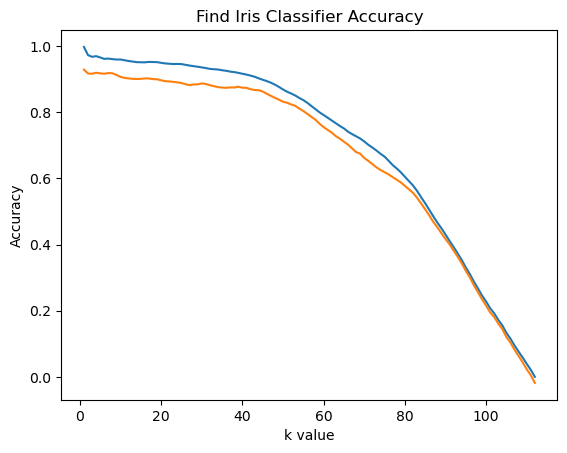

In [43]:
# KNN

#from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

k_range = range(1,113)
find_accuracy0 = []
find_accuracy1 = []

for k in k_range:
  find_model = KNeighborsRegressor(n_neighbors = k)
  find_model.fit(x_train, y_train.values.ravel())

  find_accuracy0.append(find_model.score(x_train, y_train))
  find_accuracy1.append(find_model.score(x_test, y_test))

plt.plot(k_range, find_accuracy0, label="training accuracy0")
plt.plot(k_range, find_accuracy1, label="training accuracy1")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("Find Iris Classifier Accuracy")
plt.show()

In [46]:
model = KNeighborsRegressor(n_neighbors = 1)
model.fit(x_train, y_train.values.ravel())
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))
pred_knn = model.predict(x_test)

0.9973443353725044
0.9287955142309603


In [47]:
mse = np.sqrt(mean_squared_error(pred_knn, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.18637822325921866
